<a href="https://colab.research.google.com/github/Basicnickname/Progetto-Lab-3/blob/main/Fit_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Università di Pavia - Dipartimento di Fisica - Laboratorio di Fisica III**

##Template generico per analisi dati

---
###`Audisio` `Insalaco` `Pezzoni`
Ultimo aggiornamento 16-10-2025

# **Disclaimer per gli autori**
Utilizzare questa casella di testo per annotare particolari modifiche fatte al documento

L'esempio su cui è basato il template tratta la relazione tra I e V per un fotodiodo polarizzato inversamente

Il colab prevede la possibilità di caricare dati in formato xlsx o google sheets (con o senza for loop), vedasi cella dedicata sottostante

Utilizzo suggerito: mantenere la divsione preimpostata e creare celle di codice differenti a seconda del fit effettuato, dichiarando pertanto tutte le funzioni nel capitolo dedicato etc...

# Inizializzazione

##Import librerie

In [ ]:
#Melius abundare quam deficere
import numpy as np
from scipy import optimize as sop
from scipy import constants as scc
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd
from google.colab import auth
import gspread
from google.auth import default

##Definizione variabili globali

In [ ]:
#Attenzione a nomi e unità di misura
e = scc.e
Kb = scc.Boltzmann
T = 300
R = 20000
print(e, Kb, T, R)

1.602176634e-19 1.380649e-23 300 20000


##Upload dati sperimentali e creazione numpy arrays
Di default è prevista l'importazione da google fogli

Nel caso si utilizzi excel attivare la prima cella e commentare la seconda

###Per importare in formato excel

In [ ]:
"""from google.colab import drive
drive.mount('/content/drive')
# To define the path, open the local disk in the left menu, look for the file in the drive,
# open the menu with 3 vertical dots, click on "copia percorso", copy the path in the filename. Done!
filename = '/content/drive/MyDrive/LAB 3/TEST/Test per Template.xlsx'
data_1_e = pd.read_excel(filename,0) #la seconda variabile indica la pagina del foglio
print(data_1_e)
# Conversione in numpy arrays
V=data_1_e['V (mV)'].to_numpy()
I=data_1_e['I (mA)'].to_numpy()
#Check
print(type(V), type(I))
print(V)
print(I)"""

'from google.colab import drive\ndrive.mount(\'/content/drive\')\n# To define the path, open the local disk in the left menu, look for the file in the drive,\n# open the menu with 3 vertical dots, click on "copia percorso", copy the path in the filename. Done!\nfilename = \'/content/drive/MyDrive/LAB 3/TEST/Test per Template.xlsx\'\ndata_1_e = pd.read_excel(filename,0) #la seconda variabile indica la pagina del foglio\nprint(data_1_e)\n# Conversione in numpy arrays\nV=data_1_e[\'V (mV)\'].to_numpy()\nI=data_1_e[\'I (mA)\'].to_numpy()\n#Check\nprint(type(V), type(I))\nprint(V)\nprint(I)'

###Per importare da google fogli

In [ ]:
auth.authenticate_user() #Autenticazione
creds, _ = default()
gc = gspread.authorize(creds)
# Inserire url file dati
url = "https://docs.google.com/spreadsheets/d/1KFkzv6_bOkDHnaHCEmjUEJrFymNCpiLccYkEsv-p9Nw/edit?gid=0#gid=0"
sht = gc.open_by_url(url) #Apre il file
#sht_list = sht.worksheets() #Lista pagine nel file
#print (sht_list)
data_1 = sht.get_worksheet(0) #Seleziona la prima pagina del file
#data_2 = sht.get_worksheet(1)
data_1_val = data_1.get_all_values() # Ottiene tutti i valori come lista di liste
# Converti la lista di liste in un DataFrame pandas seleziona i valori dalla seconda riga, utilizza la prima per i nomi delle colonne
df_data_1 = pd.DataFrame(data_1_val[1:], columns=data_1_val[0])
df_data_1 = df_data_1.replace(",", ".", regex=True).astype(float)
print(df_data_1)
# Conversione in numpy arrays
V=df_data_1['V (mV)'].to_numpy()
I=df_data_1['I (mA)'].to_numpy()
#Check
print(type(V), type(I))
print(V)
print(I)

     V (mV)  I (mA)
0     29.01     1.0
1     53.32     2.0
2    131.60     3.0
3    185.40     4.0
4    241.00     5.0
5    295.90     6.0
6    352.20     7.0
7    408.50     8.0
8    465.00     9.0
9    520.80    10.0
10   576.40    11.0
11   629.00    12.0
12   684.00    13.0
13   736.00    14.0
14   790.00    15.0
15   838.00    16.0
16   887.00    17.0
17   933.00    18.0
18   983.00    19.0
19  1030.00    20.0
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[  29.01   53.32  131.6   185.4   241.    295.9   352.2   408.5   465.
  520.8   576.4   629.    684.    736.    790.    838.    887.    933.
  983.   1030.  ]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]


In [ ]:
#Versione con for loop
"""auth.authenticate_user() #Autenticazione
creds, _ = default()
gc = gspread.authorize(creds)
# Inserire url file dati
url = "https://docs.google.com/spreadsheets/d/1KFkzv6_bOkDHnaHCEmjUEJrFymNCpiLccYkEsv-p9Nw/edit?gid=0#gid=0"
sht = gc.open_by_url(url) #Apre il file
sht_list = sht.worksheets() #Lista pagine nel file
num = len(sht_list) #Indica il numero di pagine nel file
#print (sht_list)

I_data = [None] * num
V_data = [None] * num

for i in range(num):
  data_i = sht.get_worksheet(i)
  data_i_val = data_i.get_all_values()
  df_data_i = pd.DataFrame(data_i_val[1:], columns=data_i_val[0])
  df_data_i = df_data_i.replace(",", ".", regex=True).astype(float)
  print(df_data_i)
  I_data[i] = df_data_i['I (mA)'].to_numpy()
  V_data[i] = df_data_i['V (mV)'].to_numpy()
  print(type(I_data[i]), type(V_data[i]))
  print(V_data[i])
  print(I_data[i])"""


'auth.authenticate_user() #Autenticazione\ncreds, _ = default()\ngc = gspread.authorize(creds)\n# Inserire url file dati\nurl = "https://docs.google.com/spreadsheets/d/1KFkzv6_bOkDHnaHCEmjUEJrFymNCpiLccYkEsv-p9Nw/edit?gid=0#gid=0"\nsht = gc.open_by_url(url) #Apre il file\nsht_list = sht.worksheets() #Lista pagine nel file\nnum = len(sht_list) #Indica il numero di pagine nel file\n#print (sht_list)\n\nI_data = [None] * num\nV_data = [None] * num\n\nfor i in range(num):\n  data_i = sht.get_worksheet(i)\n  data_i_val = data_i.get_all_values()\n  df_data_i = pd.DataFrame(data_i_val[1:], columns=data_i_val[0])\n  df_data_i = df_data_i.replace(",", ".", regex=True).astype(float)\n  print(df_data_i)\n  I_data[i] = df_data_i[\'I (mA)\'].to_numpy()\n  V_data[i] = df_data_i[\'V (mV)\'].to_numpy()\n  print(type(I_data[i]), type(V_data[i]))\n  print(V_data[i])\n  print(I_data[i])'

#Preanalisi
Si visualizzano i dati graficati

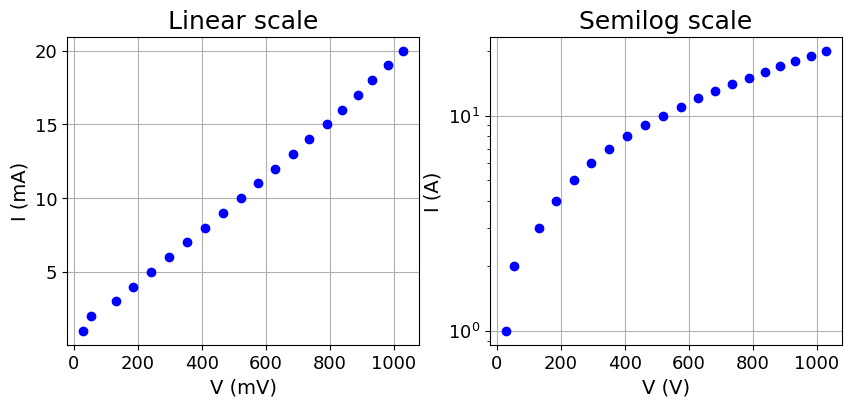

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10,4]) #Crea una figura di due subplot ax*, 1 riga comune e 2 colonne diverse

titlefontsize, labelfontsize, tickfontsize=18, 14, 13 #uniforma le variabili "decorative" per i 2 subplot (ossia dimensioni titoli subplot,titoli assi e punti sugli assi)
markersize, linewidth = 6, 1 #dimensioni marker e spessore linea
xticks = np.linspace(0,1000,6) #definisce i punti di partenza, fine e i tick

ax1.set_title('Linear scale', size=titlefontsize)
ax1.plot(V, I, 'o', markersize=markersize, linewidth=linewidth, color='blue')
ax1.set_xlabel('V (mV)', size=labelfontsize)
ax1.set_ylabel('I (mA)', size=labelfontsize)
ax1.set_xticks(xticks) #anche senza specificare gli xticks se la cava abbastanza bene
ax1.tick_params(labelsize=tickfontsize)
ax1.grid(True) #aggiunge una griglia

ax2.set_yscale('log') #rende la scala delle ordinate logaritmica
ax2.set_title('Semilog scale', size=titlefontsize)
#ax2.plot(V[1:], I[1:], 'o', markersize=markersize, linewidth=linewidth, color='red')  # per escludere (0,0) in caso di divergenza logaritmica
ax2.plot(V, I, 'o', markersize=markersize, linewidth=linewidth, color='blue')
ax2.set_xlabel('V (V)', size=labelfontsize)
ax2.set_ylabel('I (A)', size=labelfontsize)
ax2.set_xticks(xticks)
ax2.tick_params(labelsize=tickfontsize)
ax2.grid(True)

# Test manuale della funzione (attivare solo dopo aver definito la funzione)
#I0_test, n_test = 1.18e-5, 1.5
#V_test = np.linspace(0, 0.6,  100)
#I_test = fun(V_test, I0_test, n_test)
#ax1.plot(V_test, I_test, '-', linewidth=linewidth, color='red')
#ax2.plot(V_test, I_test, '-', linewidth=linewidth, color='red')"""

#Funzioni di Fit

In [ ]:
def fun(V,beta):
    I=V/(R*beta)
    return I
#print(fun(1,1))

#Fits

In [ ]:
ndata=len(I)
beta_min, beta_max = 0, +np.inf
bounds = [beta_min, beta_max]
#min, max = [1_min, 2_min], [1_max, 2_max] #sintassi per più variabili
#bounds = [min, max]

popt, pcov=sop.curve_fit(fun, V, I, bounds=bounds) #popt è un array contentente i valori ottimali, pcov rappresenta la matrice di covarianza
beta_fit = popt[0]
sigma = np.sqrt(ndata*np.diag(pcov))

print(f"Risultati fit: \u03B2 ={beta_fit:11.4e}, std err={sigma[0]:10.4e}, rel err={sigma[0]/beta_fit:10.4e}")

Risultati fit: β = 2.5954e-03, std err=7.0627e-05, rel err=2.7212e-02


#Plots

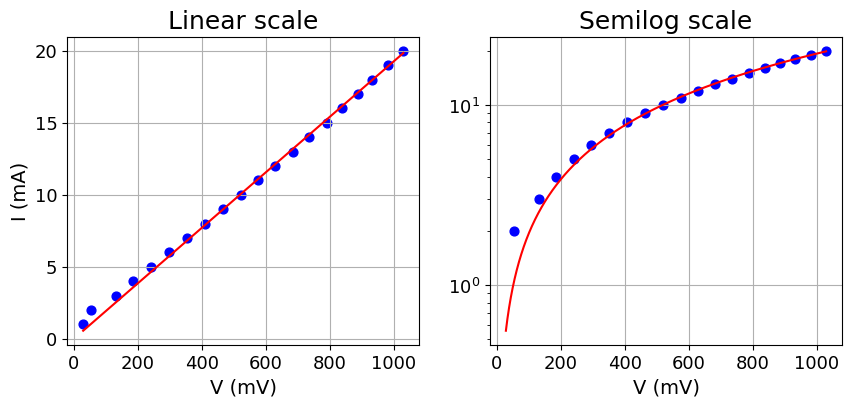

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10,4])

titlefontsize, labelfontsize, tickfontsize=18, 14, 13
markersize, linewidth = 40, 1
xticks = np.linspace(0,1000,6)

xmin,xmax=V[0],V[ndata-1]
x=np.arange(xmin,xmax+1e-5,0.01)
y=fun(x,beta_fit)


ax1.set_title('Linear scale', size=titlefontsize)
ax1.scatter(V, I, color='blue', s=markersize) #grafico a dispersione, si può usare anche .plot
ax1.plot(x,y, color='red')
ax1.set_xlabel('V (mV)', size=labelfontsize)
ax1.set_ylabel('I (mA)', size=labelfontsize)
ax1.set_xticks(xticks)
ax1.tick_params(labelsize=tickfontsize)
ax1.grid(True)


ax2.set_yscale('log')
ax2.set_title('Semilog scale', size=titlefontsize)
ax2.scatter(V[1:], I[1:], color='blue', s=markersize)
ax2.plot(x,y, color='red')
ax2.set_xlabel('V (mV)', size=labelfontsize)
#ax2.set_ylabel('I (mA)', size=labelfontsize)
ax2.set_xticks(xticks)
ax2.tick_params(labelsize=tickfontsize)
ax2.grid(True)